# Reading a GPX file as an XML in R
Based on the methods found [here](https://www.tutorialspoint.com/r/r_xml_files.htm).
The GPX file (v 1.0) was created using the [GPS Logger](http://www.basicairdata.eu/projects/android/android-gps-logger/getting-started-guide-for-gps-logger/) app.

_Note that the `readGPX` function found in `plotKML` package requires a load of dependencies to be installed, including GDAL; best to avoid if at all possible._

For working with dates and times, try the `chron` function (see [here](https://www.stat.berkeley.edu/~s133/dates.html)).
Methods are copied from the `plot_gapfill.R` function from the [GePiSaT](https://bitbucket.org/labprentice/gepisat/src/master/tools/plotting/plot_gapfill.R) project.

In [ ]:
install.packages("chron")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("XML")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("XML")
library("methods")
library("chron")

In [ ]:
result <- xmlParse("/tmp/20210126-151617.gpx")

In [ ]:
rootNode <- xmlRoot(result)

In [ ]:
# Do some digging to find the trk element
rootNode[6]

In [ ]:
# First element is the name, second are the trkpoints
my.df <- xmlToDataFrame(rootNode[[6]][[2]])

In [ ]:
my.df$time[1]

[1] "2021-01-26T20:16:17Z"

In [ ]:
gsub("Z", "", my.df$time[1])

[1] "2021-01-26T20:16:17"

In [ ]:
strsplit(my.df$time[1], "T")

[[1]]
[1] "2021-01-26" "20:16:17Z"

In [ ]:
# Combining lots of function calls together:
# essentially, remove the "Z" from end of the character string
# split the character string on the T's
# and do a row-wise combination of the data (actually a character matrix)
my.datetime <- do.call(
    rbind, sapply(gsub("Z", "", my.df$time), strsplit, split="T")
  )

In [ ]:
as.character(my.datetime[,2])

In [ ]:
my.tstamp <- chron(
  dates = as.character(my.datetime[,1]),
  times = as.character(my.datetime[,2]),
  format = c("Y-m-d", "h:m:s")
)

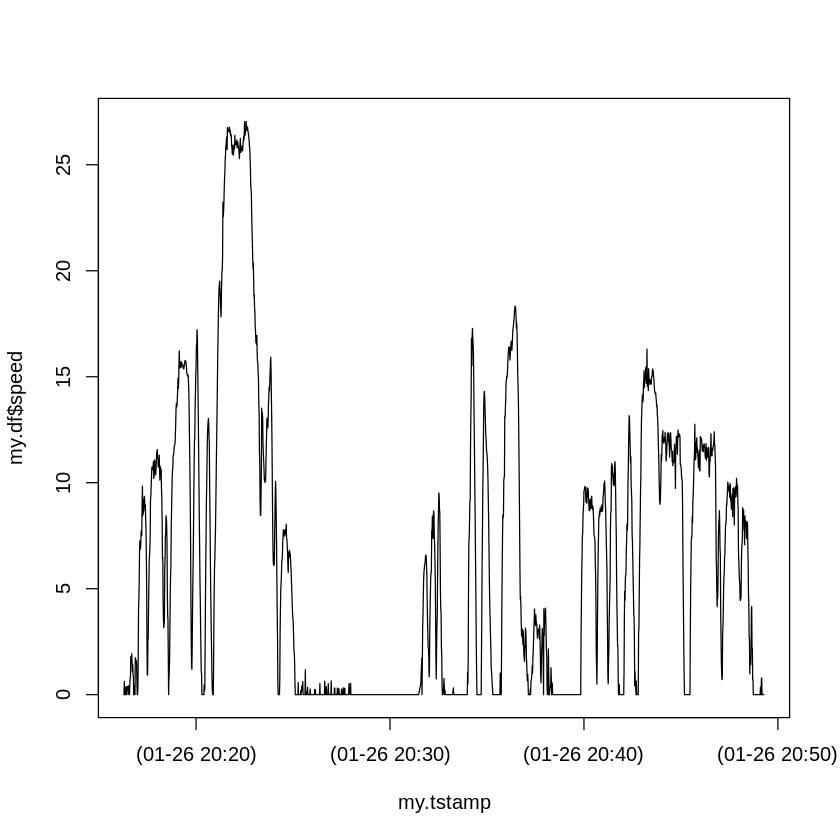

In [ ]:
plot(my.tstamp, my.df$speed, type = "l", lwd = 1, lty = 1)